In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

In [7]:
# Load dataset dari path yang diberikan
df = pd.read_csv('/content/drive/MyDrive/kuliah/data/Produksi Tanaman Cabe.csv')

In [5]:
df

,Provinsi,Tahun,Produksi
0,ACEH,2003,11923.0
1,ACEH,2004,13147.0
2,ACEH,2005,13849.8
3,ACEH,2006,14578.0
4,ACEH,2007,11208.0
...,...,...,...
541,PAPUA,2019,4388.0
542,PAPUA,2020,3436.0
543,PAPUA,2021,5054.0
544,PAPUA,2022,4335.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  546 non-null    object 
 1   Tahun     546 non-null    int64  
 2   Produksi  546 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.9+ KB


In [ ]:
df.describe()

,Tahun,Produksi
count,546.000000,546.000000
mean,2013.000000,30433.777473
std,6.060853,74214.300946
min,2003.000000,0.000000
25%,2008.000000,2542.000000
50%,2013.000000,6163.000000
75%,2018.000000,20498.500000
max,2023.000000,684943.000000


In [8]:
# Konversi data Tahun menjadi numerik
df['Tahun'] = pd.to_numeric(df['Tahun'])

In [9]:
# Buat model prediksi untuk setiap provinsi
provinsi = df['Provinsi'].unique()
prediksi = {}
all_y_test = []
all_y_pred = []

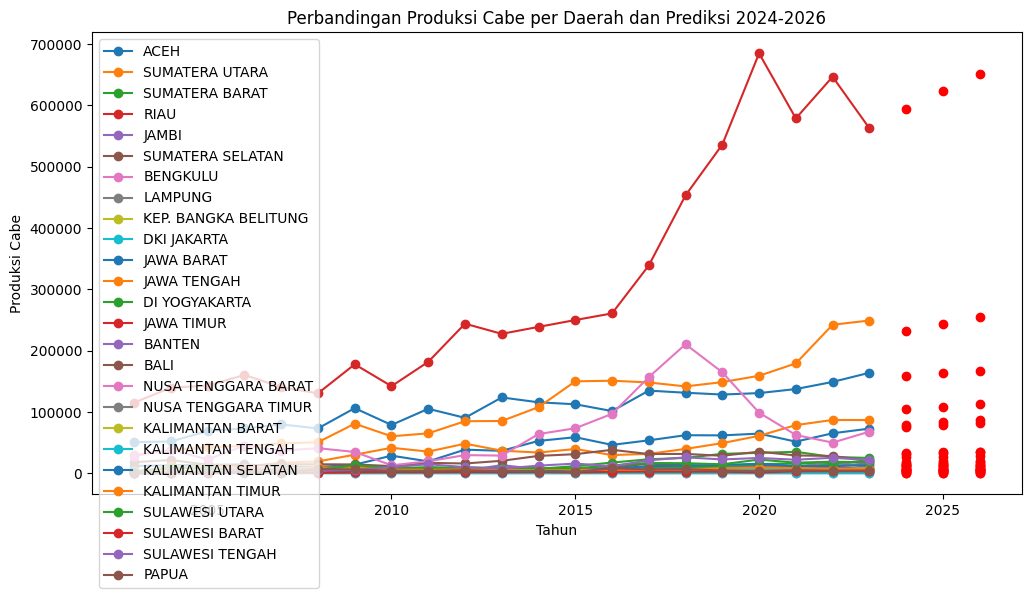


Hasil Prediksi Produksi Cabe untuk Tahun 2024-2026:
ACEH 2024: 75776.40
ACEH 2025: 79252.45
ACEH 2026: 82728.50
SUMATERA UTARA 2024: 79361.07
SUMATERA UTARA 2025: 83045.08
SUMATERA UTARA 2026: 86729.09
SUMATERA BARAT 2024: 31935.97
SUMATERA BARAT 2025: 33693.45
SUMATERA BARAT 2026: 35450.92
RIAU 2024: 8759.04
RIAU 2025: 9062.71
RIAU 2026: 9366.38
JAMBI 2024: 14583.54
JAMBI 2025: 15269.89
JAMBI 2026: 15956.23
SUMATERA SELATAN 2024: 11195.99
SUMATERA SELATAN 2025: 11584.72
SUMATERA SELATAN 2026: 11973.46
BENGKULU 2024: 1291.00
BENGKULU 2025: 1291.00
BENGKULU 2026: 1291.00
LAMPUNG 2024: 1626.00
LAMPUNG 2025: 1626.00
LAMPUNG 2026: 1626.00
KEP. BANGKA BELITUNG 2024: 3767.73
KEP. BANGKA BELITUNG 2025: 3854.87
KEP. BANGKA BELITUNG 2026: 3942.01
DKI JAKARTA 2024: -4.76
DKI JAKARTA 2025: -5.66
DKI JAKARTA 2026: -6.55
JAWA BARAT 2024: 158118.02
JAWA BARAT 2025: 162855.62
JAWA BARAT 2026: 167593.23
JAWA TENGAH 2024: 232894.97
JAWA TENGAH 2025: 243979.63
JAWA TENGAH 2026: 255064.29
DI YOGYAKARTA 

In [11]:
plt.figure(figsize=(12, 6))

# Daftar tahun yang ingin diprediksi
tahun_prediksi_list = [2024, 2025, 2026]

for prov in provinsi:
    # Ambil data untuk provinsi tertentu
    province_data = df[df['Provinsi'] == prov]

    # Siapkan data untuk model
    X = province_data[['Tahun']]
    y = province_data['Produksi']

    # Normalisasi data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data menjadi training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Buat model linear regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediksi pada data test
    y_pred = model.predict(X_test)

    # Simpan hasil prediksi dan nilai sebenarnya untuk RMSE keseluruhan
    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)

    # Prediksi produksi cabe untuk tahun 2024, 2025, dan 2026
    for tahun_prediksi in tahun_prediksi_list:
        X_prediksi = scaler.transform(pd.DataFrame({'Tahun': [tahun_prediksi]}))
        y_prediksi = model.predict(X_prediksi)
        prediksi[(prov, tahun_prediksi)] = y_prediksi[0]

    # Plot data produksi per provinsi
    plt.plot(province_data['Tahun'], province_data['Produksi'], marker='o', label=prov)

# Menambahkan prediksi untuk tahun 2024, 2025, dan 2026
for prov in provinsi:
    for tahun in tahun_prediksi_list:
        plt.plot([tahun], [prediksi[(prov, tahun)]], 'ro')  # Titik merah untuk prediksi

plt.xlabel('Tahun')
plt.ylabel('Produksi Cabe')
plt.title('Perbandingan Produksi Cabe per Daerah dan Prediksi 2024-2026')
plt.legend()
plt.show()

# Print hasil prediksi untuk tahun 2024, 2025, dan 2026
print("\nHasil Prediksi Produksi Cabe untuk Tahun 2024-2026:")
for prov in provinsi:
    for tahun in tahun_prediksi_list:
        print(f'{prov} {tahun}: {prediksi[(prov, tahun)]:.2f}')

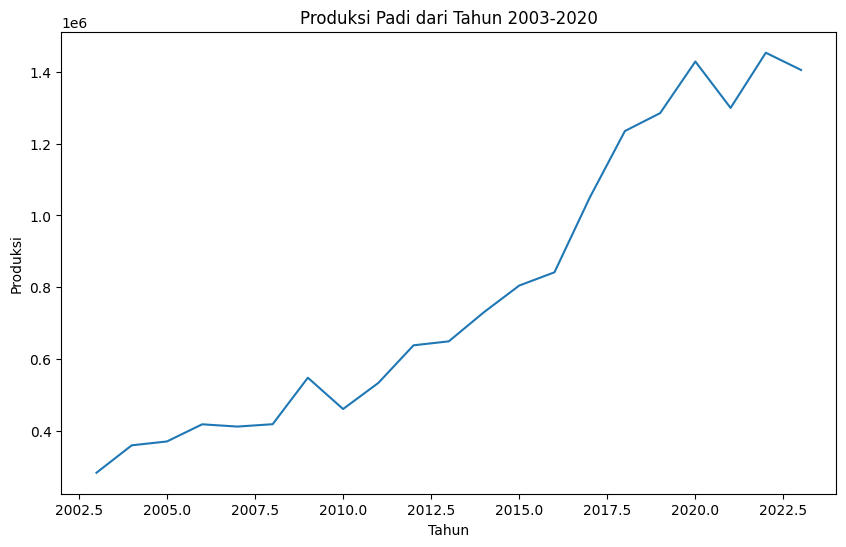

In [ ]:
plt.figure(figsize=(10,6))
df.groupby('Tahun')['Produksi'].sum().plot()
plt.xlabel('Tahun')
plt.ylabel('Produksi')
plt.title('Produksi Padi dari Tahun 2003-2020')
plt.show()

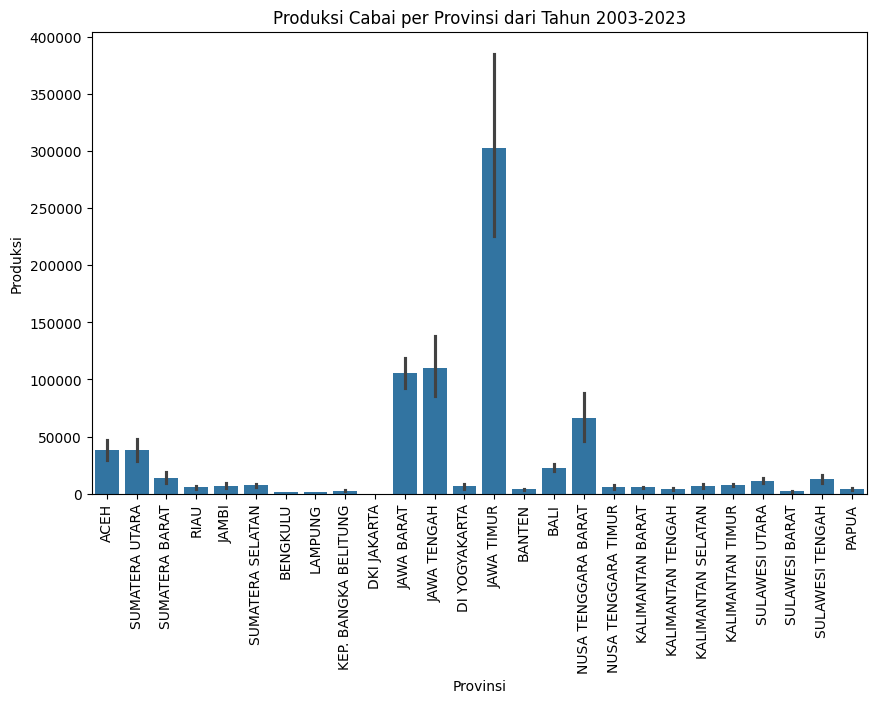

Produksi cabai per Provinsi dari Tahun 2003-2023: 
 Provinsi
ACEH                     803448.8
BALI                     479003.5
BANTEN                    76361.8
BENGKULU                  27111.0
DI YOGYAKARTA            131284.7
DKI JAKARTA                  83.1
JAMBI                    147687.1
JAWA BARAT              2208948.8
JAWA TENGAH             2308792.6
JAWA TIMUR              6354258.4
KALIMANTAN BARAT         112712.1
KALIMANTAN SELATAN       141326.4
KALIMANTAN TENGAH         85262.8
KALIMANTAN TIMUR         158274.7
KEP. BANGKA BELITUNG      55255.8
LAMPUNG                   34146.0
NUSA TENGGARA BARAT     1385197.0
NUSA TENGGARA TIMUR      113612.5
PAPUA                     82623.2
RIAU                     118257.0
SULAWESI BARAT            41005.0
SULAWESI TENGAH          273174.4
SULAWESI UTARA           238031.0
SUMATERA BARAT           289585.9
SUMATERA SELATAN         149043.4
SUMATERA UTARA           802355.5
Name: Produksi, dtype: float64


In [ ]:
# Visualisasi Produksi per Provinsi
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Provinsi'], y=df['Produksi'])
plt.xlabel('Provinsi')
plt.xticks(rotation=90)
plt.ylabel('Produksi')
plt.title('Produksi Cabai per Provinsi dari Tahun 2003-2023')
plt.show()

# Menampilkan total produksi cabai per provinsi
total_produksi = df.groupby('Provinsi')['Produksi'].sum()
print('Produksi cabai per Provinsi dari Tahun 2003-2023: \n', total_produksi)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
# Evaluasi model
mse = mean_squared_error(all_y_test, all_y_pred)  # Hitung MSE
rmse = mean_squared_error(all_y_test, all_y_pred, squared=False)  # Hitung RMSE
r_squared = r2_score(all_y_test, all_y_pred)  # Hitung R-squared

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')

MSE: 725922548.8079842
RMSE: 26942.949890611166
R-squared: 0.8838364194314519


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
